In [ ]:
import pandas as pd
import numpy as np
!pip install pandas-profiling
import ydata_profiling
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ef90fbba6fb450ee29c37a400abe73b40a89b141c3ca8a283d69cffb51fc08db
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
data=pd.read_csv('/content/bank.csv')
data.head(5)

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

▶ **Data Preprocessing**

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.tail(5)

age          job  marital  education default  balance housing loan  \
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
profile=ProfileReport(data)
profile.to_file('report.html')




/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

▶ **Data Visualization**

In [ ]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

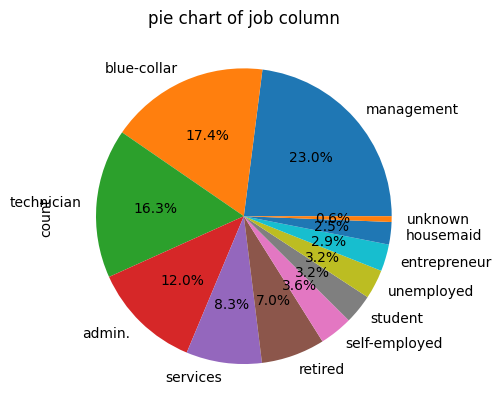

In [ ]:
'''pie chart with percentges of job column while making sure that if  '''
data['job'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('pie chart of job column')
plt.show

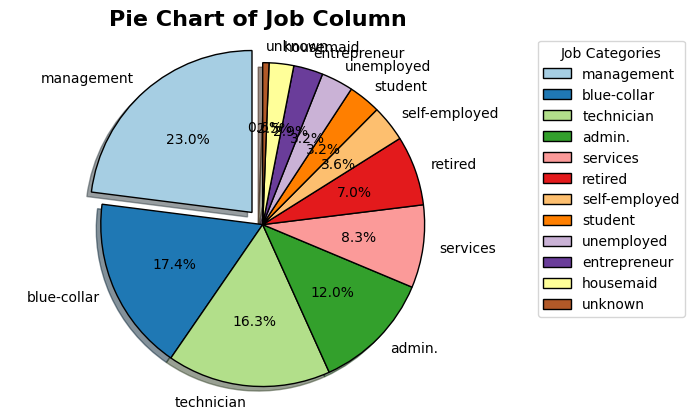

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'job' is the column of interest

# Customizing the colors for the pie chart
colors = plt.cm.Paired.colors  # A set of visually distinct colors

# Exploding the largest slice to emphasize it (optional)
explode = (0.1,) + (0,) * (data['job'].nunique() - 1)  # Explode the first slice

# Plotting the pie chart
data['job'].value_counts().plot(kind='pie',
                                autopct='%1.1f%%',
                                colors=colors,
                                explode=explode,
                                shadow=True,
                                startangle=90,
                                wedgeprops={'edgecolor': 'black'})

# Customizing the plot further
plt.title('Pie Chart of Job Column', fontsize=16, fontweight='bold')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Adding a legend (optional)
plt.legend(title='Job Categories', bbox_to_anchor=(1.05, 1), loc='best')

# Displaying the plot
plt.show()


In [ ]:
data.head(5)

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

<function matplotlib.pyplot.show(close=None, block=None)>

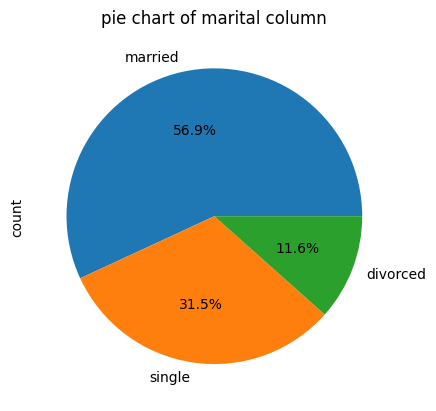

In [ ]:
'''now pie chart of marital column'''
data['marital'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('pie chart of marital column')
plt.show

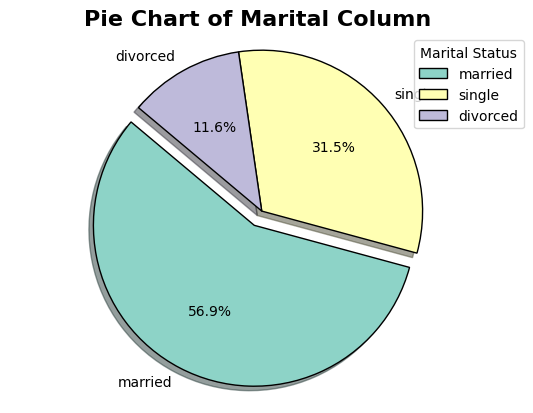

In [ ]:
import matplotlib.pyplot as plt

# Customizing the colors for the pie chart
colors = plt.cm.Set3.colors  # A set of pastel colors that are visually distinct

# Exploding the largest slice to emphasize it (optional)
explode = (0.1,) + (0,) * (data['marital'].nunique() - 1)  # Explode the first slice

# Plotting the pie chart
data['marital'].value_counts().plot(kind='pie',
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    explode=explode,
                                    shadow=True,
                                    startangle=140,
                                    wedgeprops={'edgecolor': 'black'})

# Customizing the plot further
plt.title('Pie Chart of Marital Column', fontsize=16, fontweight='bold')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Adding a legend (optional)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='best')

# Displaying the plot
plt.show()


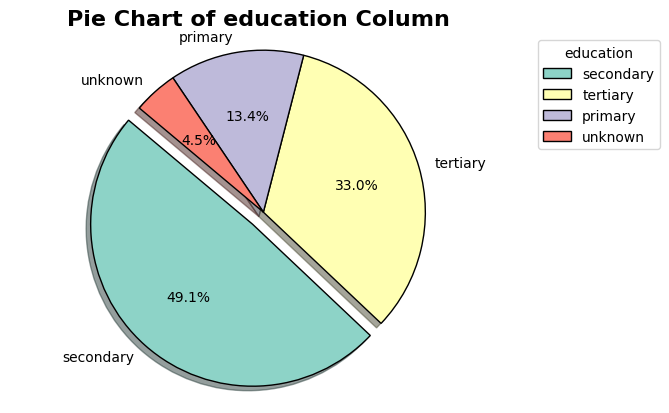

In [ ]:
import matplotlib.pyplot as plt

# Customizing the colors for the pie chart
colors = plt.cm.Set3.colors  # A set of pastel colors that are visually distinct

# Exploding the largest slice to emphasize it (optional)
explode = (0.1,) + (0,) * (data['education'].nunique() - 1)  # Explode the first slice

# Plotting the pie chart
data['education'].value_counts().plot(kind='pie',
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    explode=explode,
                                    shadow=True,
                                    startangle=140,
                                    wedgeprops={'edgecolor': 'black'})

# Customizing the plot further
plt.title('Pie Chart of education Column', fontsize=16, fontweight='bold')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Adding a legend (optional)
plt.legend(title='education', bbox_to_anchor=(1.05, 1), loc='best')

# Displaying the plot
plt.show()


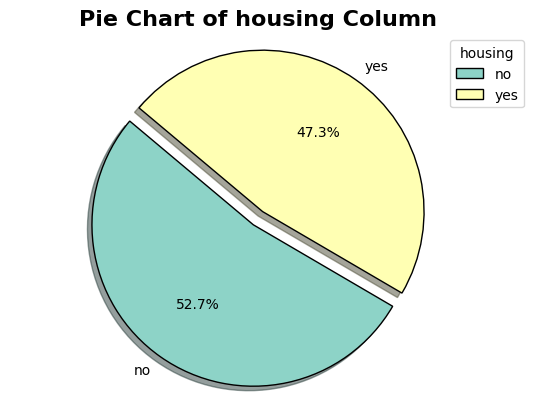

In [ ]:
import matplotlib.pyplot as plt

# Customizing the colors for the pie chart
colors = plt.cm.Set3.colors  # A set of pastel colors that are visually distinct

# Exploding the largest slice to emphasize it (optional)
explode = (0.1,) + (0,) * (data['housing'].nunique() - 1)  # Explode the first slice

# Plotting the pie chart
data['housing'].value_counts().plot(kind='pie',
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    explode=explode,
                                    shadow=True,
                                    startangle=140,
                                    wedgeprops={'edgecolor': 'black'})

# Customizing the plot further
plt.title('Pie Chart of housing Column', fontsize=16, fontweight='bold')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Adding a legend (optional)
plt.legend(title='housing', bbox_to_anchor=(1.05, 1), loc='best')

# Displaying the plot
plt.show()

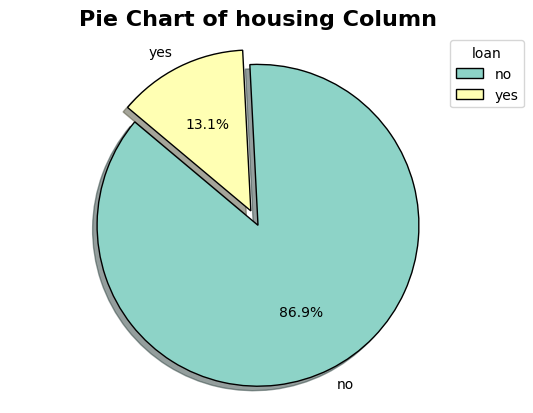

In [ ]:
import matplotlib.pyplot as plt

# Customizing the colors for the pie chart
colors = plt.cm.Set3.colors  # A set of pastel colors that are visually distinct

# Exploding the largest slice to emphasize it (optional)
explode = (0.1,) + (0,) * (data['loan'].nunique() - 1)  # Explode the first slice

# Plotting the pie chart
data['loan'].value_counts().plot(kind='pie',
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    explode=explode,
                                    shadow=True,
                                    startangle=140,
                                    wedgeprops={'edgecolor': 'black'})

# Customizing the plot further
plt.title('Pie Chart of housing Column', fontsize=16, fontweight='bold')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.axis('equal')  # Ensures that pie is drawn as a circle

# Adding a legend (optional)
plt.legend(title='loan', bbox_to_anchor=(1.05, 1), loc='best')

# Displaying the plot
plt.show()

In [ ]:
data.head(5)

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [20]:
'''let transform the job column usin one hot encoding '''
data=pd.get_dummies(data,columns=['job'], dtype=int)
data.head(5)

age  marital  education default  balance housing loan  contact  day month  \
0   59  married  secondary      no     2343     yes   no  unknown    5   may   
1   56  married  secondary      no       45      no   no  unknown    5   may   
2   41  married  secondary      no     1270     yes   no  unknown    5   may   
3   55  married  secondary      no     2476     yes   no  unknown    5   may   
4   54  married   tertiary      no      184      no   no  unknown    5   may   

   ...  job_entrepreneur  job_housemaid  job_management  job_retired  \
0  ...                 0              0               0            0   
1  ...                 0              0               0            0   
2  ...                 0              0               0            0   
3  ...                 0              0               0            0   
4  ...                 0              0               0            0   

  job_self-employed job_services  job_student  job_technician  job_unemployed  \
0                 0            0            0               0               0   
1                 0            0            0               0               0   
2                 0            0            0               1               0   
3                 0            1            0               0               0   
4                 0            0            0               0               0   

   job_unknown  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 28 columns]

In [21]:
'''lets transform the marital column using one hot encoding'''
data=pd.get_dummies(data,columns=['marital'], dtype=int)
data.head(5)

age  education default  balance housing loan  contact  day month  duration  \
0   59  secondary      no     2343     yes   no  unknown    5   may      1042   
1   56  secondary      no       45      no   no  unknown    5   may      1467   
2   41  secondary      no     1270     yes   no  unknown    5   may      1389   
3   55  secondary      no     2476     yes   no  unknown    5   may       579   
4   54   tertiary      no      184      no   no  unknown    5   may       673   

   ...  job_retired  job_self-employed  job_services job_student  \
0  ...            0                  0             0           0   
1  ...            0                  0             0           0   
2  ...            0                  0             0           0   
3  ...            0                  0             1           0   
4  ...            0                  0             0           0   

  job_technician  job_unemployed  job_unknown  marital_divorced  \
0              0               0            0                 0   
1              0               0            0                 0   
2              1               0            0                 0   
3              0               0            0                 0   
4              0               0            0                 0   

   marital_married  marital_single  
0                1               0  
1                1               0  
2                1               0  
3                1               0  
4                1               0  

[5 rows x 30 columns]

In [22]:
'''lets transform the education column using one hot encoding'''
data=pd.get_dummies(data,columns=['education'], dtype=int)
data.head(5)

age default  balance housing loan  contact  day month  duration  campaign  \
0   59      no     2343     yes   no  unknown    5   may      1042         1   
1   56      no       45      no   no  unknown    5   may      1467         1   
2   41      no     1270     yes   no  unknown    5   may      1389         1   
3   55      no     2476     yes   no  unknown    5   may       579         1   
4   54      no      184      no   no  unknown    5   may       673         2   

   ...  job_technician  job_unemployed job_unknown marital_divorced  \
0  ...               0               0           0                0   
1  ...               0               0           0                0   
2  ...               1               0           0                0   
3  ...               0               0           0                0   
4  ...               0               0           0                0   

   marital_married  marital_single  education_primary  education_secondary  \
0                1               0                  0                    1   
1                1               0                  0                    1   
2                1               0                  0                    1   
3                1               0                  0                    1   
4                1               0                  0                    0   

   education_tertiary  education_unknown  
0                   0                  0  
1                   0                  0  
2                   0                  0  
3                   0                  0  
4                   1                  0  

[5 rows x 33 columns]

In [23]:
'''transform all the categorical variables using one hot encoding'''
data=pd.get_dummies(data,columns=['default','housing','loan','contact','month','poutcome','deposit'], dtype=int)
data.head(5)

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   59     2343    5      1042         1     -1         0           1   
1   56       45    5      1467         1     -1         0           1   
2   41     1270    5      1389         1     -1         0           0   
3   55     2476    5       579         1     -1         0           0   
4   54      184    5       673         2     -1         0           1   

   job_blue-collar  job_entrepreneur  ...  month_may  month_nov  month_oct  \
0                0                 0  ...          1          0          0   
1                0                 0  ...          1          0          0   
2                0                 0  ...          1          0          0   
3                0                 0  ...          1          0          0   
4                0                 0  ...          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   poutcome_unknown  deposit_no  deposit_yes  
0                 1           0            1  
1                 1           0            1  
2                 1           0            1  
3                 1           0            1  
4                 1           0            1  

[5 rows x 53 columns]

In [ ]:
'''now can you generate correlation of a positive deposit with all the variables in a dictionary mentioning the variable and its correlation with positive deposit'''


In [24]:
print(data.corr()['deposit_yes'].drop('deposit_yes').to_dict())

{'age': 0.034900927890285476, 'balance': 0.08112858919103522, 'day': -0.0563258392226927, 'duration': 0.4519193608425855, 'campaign': -0.1280808461248679, 'pdays': 0.15159251635244733, 'previous': 0.1398671182007813, 'job_admin.': -0.0006097040078418521, 'job_blue-collar': -0.10084005683269727, 'job_entrepreneur': -0.034442895849378874, 'job_housemaid': -0.02415511640776123, 'job_management': 0.03630080266296977, 'job_retired': 0.10382715953658729, 'job_self-employed': -0.004706544572015886, 'job_services': -0.044530798904799614, 'job_student': 0.09995279976612648, 'job_technician': -0.011556883839501897, 'job_unemployed': 0.03348660590391163, 'job_unknown': 0.0018892247818704452, 'marital_divorced': 0.005228099815684613, 'marital_married': -0.0921572712700345, 'marital_single': 0.09463220490933735, 'education_primary': -0.0630023663654787, 'education_secondary': -0.05195162265686548, 'education_tertiary': 0.09459838565166598, 'education_unknown': 0.014354662880927006, 'default_no': 0.

In [25]:
# Features
X = data.drop(['deposit_yes', 'deposit_no'], axis=1)

# Target variable
y = data['deposit_yes']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [29]:

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7850425436632333


In [31]:
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['0','1'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [32]:
data.columns


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'deposit_no', 'deposit_yes'],
      dtype='object')

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Create artificial data
artificial_data = pd.DataFrame({
    'age': [30, 40, 50, 60, 70],
    'balance': [1000, 5000, 10000, 2000, 0],
    'day': [15, 5, 20, 10, 25],
    'duration': [300, 100, 500, 200, 150],
    'campaign': [1, 3, 2, 4, 1],
    'pdays': [-1, 100, 50, 200, -1],
    'previous': [0, 2, 1, 3, 0],
    'job_admin.': [1, 0, 0, 0, 0],
    'job_blue-collar': [0, 1, 0, 0, 0],
    'job_entrepreneur': [0, 0, 1, 0, 0],
    'job_housemaid': [0, 0, 0, 1, 0],
    'job_management': [0, 0, 0, 0, 1],
    'job_retired': [0, 0, 0, 0, 0],
    'job_self-employed': [0, 0, 0, 0, 0],
    'job_services': [0, 0, 0, 0, 0],
    'job_student': [0, 0, 0, 0, 0],
    'job_technician': [0, 0, 0, 0, 0],
    'job_unemployed': [0, 0, 0, 0, 0],
    'job_unknown': [0, 0, 0, 0, 0],
    'marital_divorced': [1, 0, 0, 0, 0],
    'marital_married': [0, 1, 1, 1, 0],
    'marital_single': [0, 0, 0, 0, 1],
    'education_primary': [1, 0, 0, 0, 0],
    'education_secondary': [0, 1, 1, 0, 1],
    'education_tertiary': [0, 0, 0, 1, 0],
    'education_unknown': [0, 0, 0, 0, 0],
    'default_no': [1, 1, 1, 1, 1],
    'default_yes': [0, 0, 0, 0, 0],
    'housing_no': [0, 1, 0, 1, 0],
    'housing_yes': [1, 0, 1, 0, 1],
    'loan_no': [1, 0, 1, 0, 1],
    'loan_yes': [0, 1, 0, 1, 0],
    'contact_cellular': [1, 0, 1, 0, 1],
    'contact_telephone': [0, 0, 0, 1, 0],
    'contact_unknown': [0, 1, 0, 0, 0],
    'month_apr': [1, 0, 0, 0, 0],
    'month_aug': [0, 1, 0, 0, 0],
    'month_dec': [0, 0, 0, 0, 0],
    'month_feb': [0, 0, 0, 0, 0],
    'month_jan': [0, 0, 0, 0, 0],
    'month_jul': [0, 0, 1, 0, 0],
    'month_jun': [0, 0, 0, 1, 0],
    'month_mar': [0, 0, 0, 0, 0],
    'month_may': [0, 0, 0, 0, 1],
    'month_nov': [0, 0, 0, 0, 0],
    'month_oct': [0, 0, 0, 0, 0],
    'month_sep': [0, 0, 0, 0, 0],
    'poutcome_failure': [0, 1, 0, 0, 0],
    'poutcome_other': [0, 0, 1, 0, 0],
    'poutcome_success': [1, 0, 0, 1, 0],
    'poutcome_unknown': [0, 0, 0, 0, 1],
    'deposit_no': [0, 1, 0, 1, 0],
    'deposit_yes': [1, 0, 1, 0, 1]
})

# Target column (assuming 'deposit_yes' is the target)
X = artificial_data.drop(columns=['deposit_no', 'deposit_yes'])
y = artificial_data['deposit_yes']

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Make predictions
predictions = clf.predict(X)

# Print the predictions
print("Predictions on artificial data:", predictions)


Predictions on artificial data: [1 0 1 0 1]


In [35]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.7781990521327015


In [36]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.7694470477975632


In [37]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.7737983034872761


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[932 234]
 [246 821]]


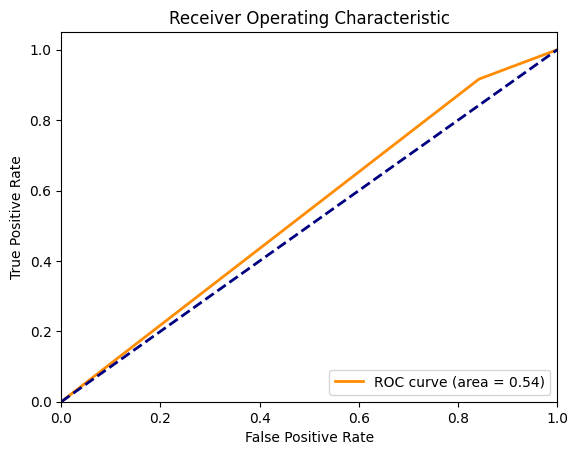

In [39]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

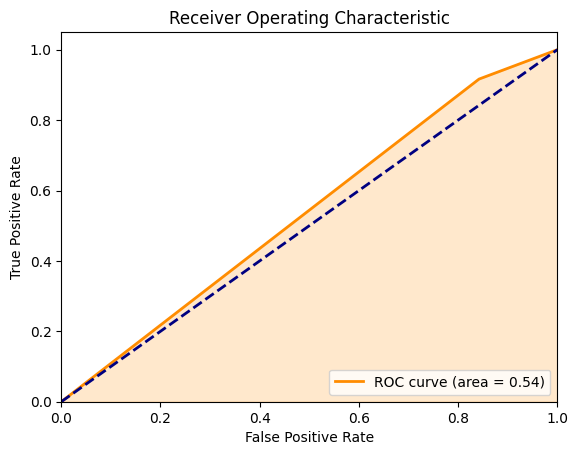

In [40]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with filled area
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='darkorange', alpha=0.2)  # Fill the area under the curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [42]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [43]:
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of improved model:", accuracy)

Accuracy of improved model: 0.8150470219435737


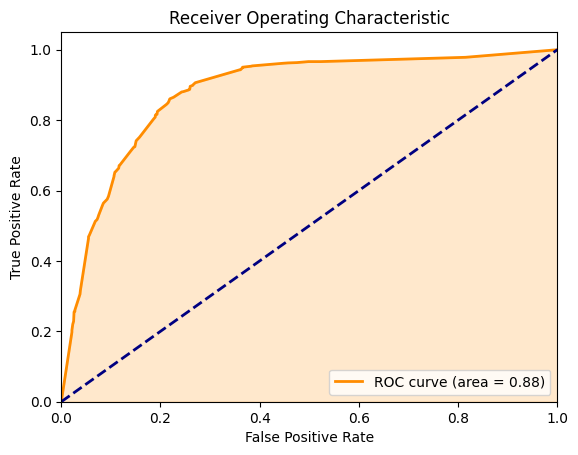

In [44]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class from the best model
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with filled area
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='darkorange', alpha=0.2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

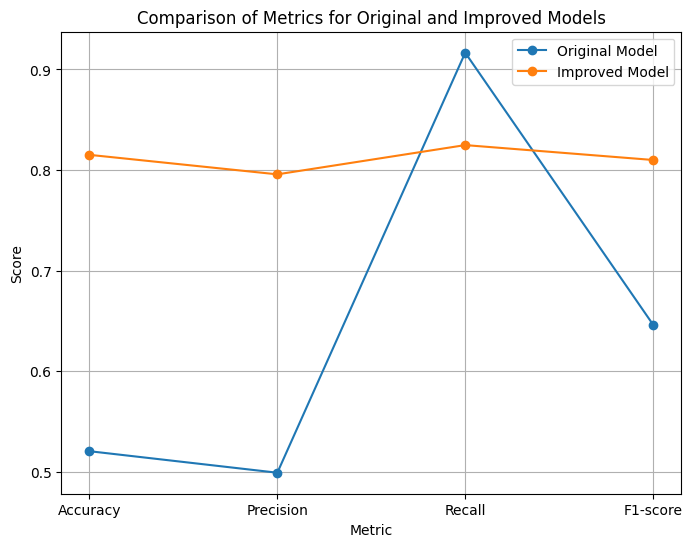

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for the original model
y_pred_original = clf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

# Calculate metrics for the improved model
y_pred_improved = best_model.predict(X_test)
accuracy_improved = accuracy_score(y_test, y_pred_improved)
precision_improved = precision_score(y_test, y_pred_improved)
recall_improved = recall_score(y_test, y_pred_improved)
f1_improved = f1_score(y_test, y_pred_improved)

# Create a list of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create lists of original and improved metric values
original_metrics = [accuracy_original, precision_original, recall_original, f1_original]
improved_metrics = [accuracy_improved, precision_improved, recall_improved, f1_improved]

# Plot the comparison
plt.figure(figsize=(8, 6))
plt.plot(metrics, original_metrics, marker='o', label='Original Model')
plt.plot(metrics, improved_metrics, marker='o', label='Improved Model')
plt.title('Comparison of Metrics for Original and Improved Models')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

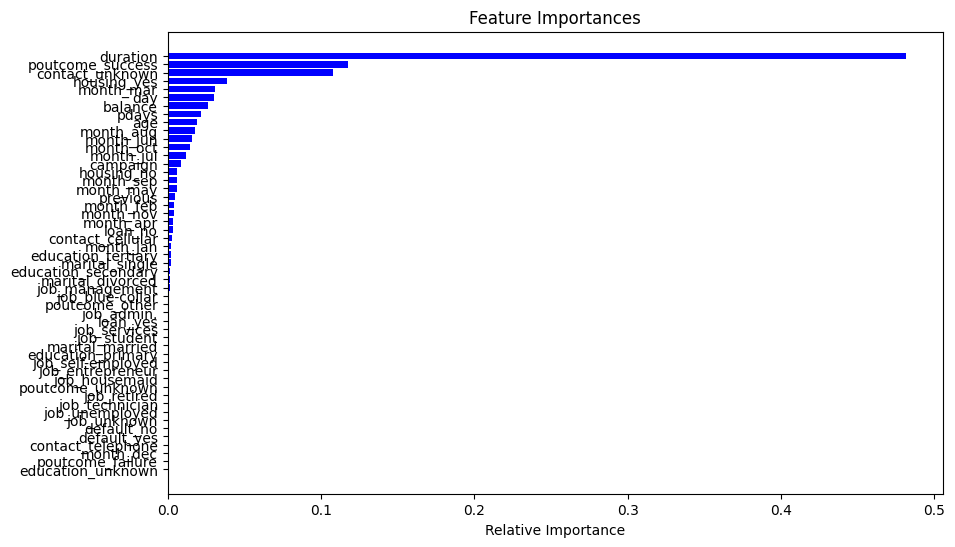

In [46]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
from sklearn import metrics # Make sure you have imported the sklearn.metrics module

# Get feature importances and sort them
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order
top_10_features = X.columns[indices[:10]]

# Create a new dataset with top 10 features
X_train_reduced = X_train[top_10_features]
X_test_reduced = X_test[top_10_features]

# Train a new model
new_clf = DecisionTreeClassifier(random_state=42)
new_clf.fit(X_train_reduced, y_train)

# Evaluate the new model
y_pred_new = new_clf.predict(X_test_reduced)
accuracy_new = metrics.accuracy_score(y_test, y_pred_new) # Call the function from the metrics module
print("Accuracy of new model:", accuracy_new)

Accuracy of new model: 0.754590237348858


Accuracy of new model: 0.754590237348858


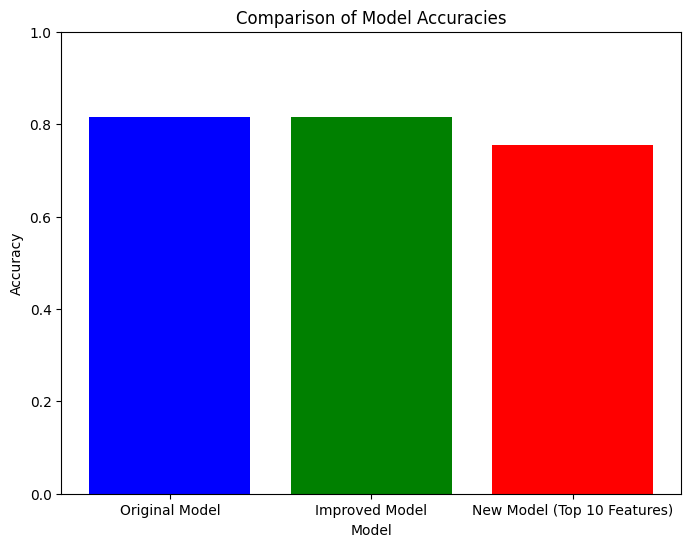

In [49]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already defined and trained 'clf' and 'best_model'

# Get feature importances and sort them
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order
top_10_features = X.columns[indices[:10]]

# Create a new dataset with top 10 features
X_train_reduced = X_train[top_10_features]
X_test_reduced = X_test[top_10_features]

# Train a new model
new_clf = DecisionTreeClassifier(random_state=42)
new_clf.fit(X_train_reduced, y_train)

# Evaluate the new model
y_pred_new = new_clf.predict(X_test_reduced)
accuracy_new = metrics.accuracy_score(y_test, y_pred_new)
print("Accuracy of new model:", accuracy_new)

# Calculate accuracy of the original and improved models (assuming you have y_pred and y_pred_improved)
accuracy_original = metrics.accuracy_score(y_test, y_pred)
accuracy_improved = metrics.accuracy_score(y_test, y_pred_improved)

# Create a list of model names
model_names = ['Original Model', 'Improved Model', 'New Model (Top 10 Features)']

# Create a list of accuracies
accuracies = [accuracy_original, accuracy_improved, accuracy_new]

# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.show()

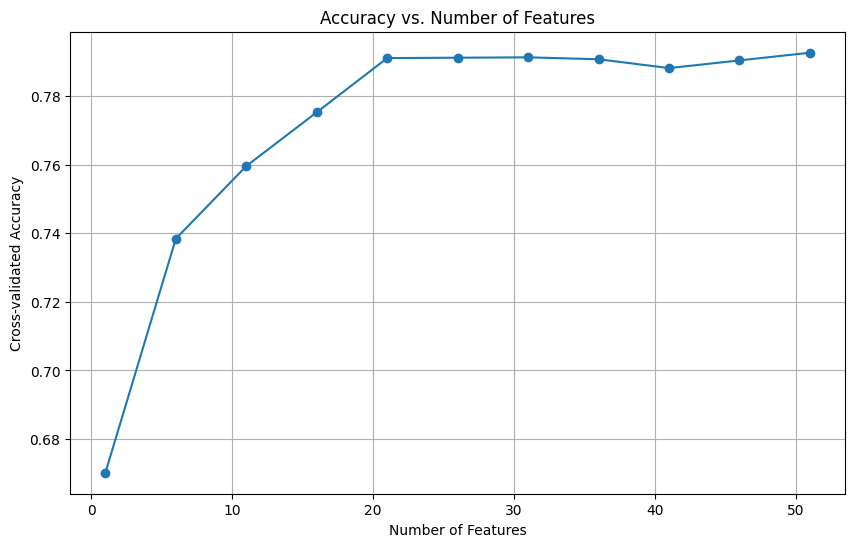

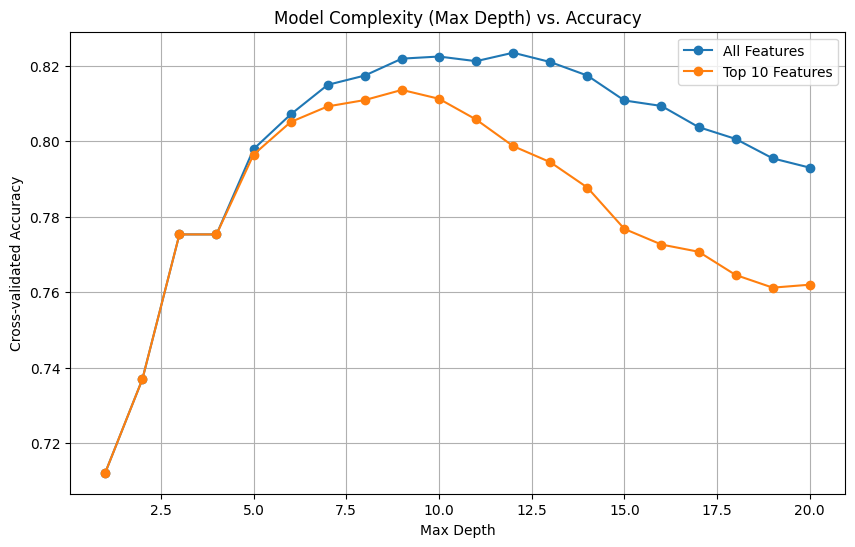

[Text(0, 0, 'duration'),
 Text(0, 1, 'day'),
 Text(0, 2, 'poutcome_success'),
 Text(0, 3, 'balance'),
 Text(0, 4, 'contact_unknown'),
 Text(0, 5, 'age'),
 Text(0, 6, 'pdays'),
 Text(0, 7, 'housing_yes'),
 Text(0, 8, 'campaign'),
 Text(0, 9, 'month_mar'),
 Text(0, 10, 'month_jul'),
 Text(0, 11, 'month_aug'),
 Text(0, 12, 'month_oct'),
 Text(0, 13, 'previous'),
 Text(0, 14, 'month_feb'),
 Text(0, 15, 'month_jun'),
 Text(0, 16, 'month_nov'),
 Text(0, 17, 'job_technician'),
 Text(0, 18, 'marital_single'),
 Text(0, 19, 'education_secondary'),
 Text(0, 20, 'month_jan'),
 Text(0, 21, 'month_may'),
 Text(0, 22, 'job_management'),
 Text(0, 23, 'job_admin.'),
 Text(0, 24, 'education_tertiary'),
 Text(0, 25, 'job_blue-collar'),
 Text(0, 26, 'contact_cellular'),
 Text(0, 27, 'month_apr'),
 Text(0, 28, 'loan_yes'),
 Text(0, 29, 'marital_divorced'),
 Text(0, 30, 'month_sep'),
 Text(0, 31, 'education_unknown'),
 Text(0, 32, 'marital_married'),
 Text(0, 33, 'job_services'),
 Text(0, 34, 'housing_no'),

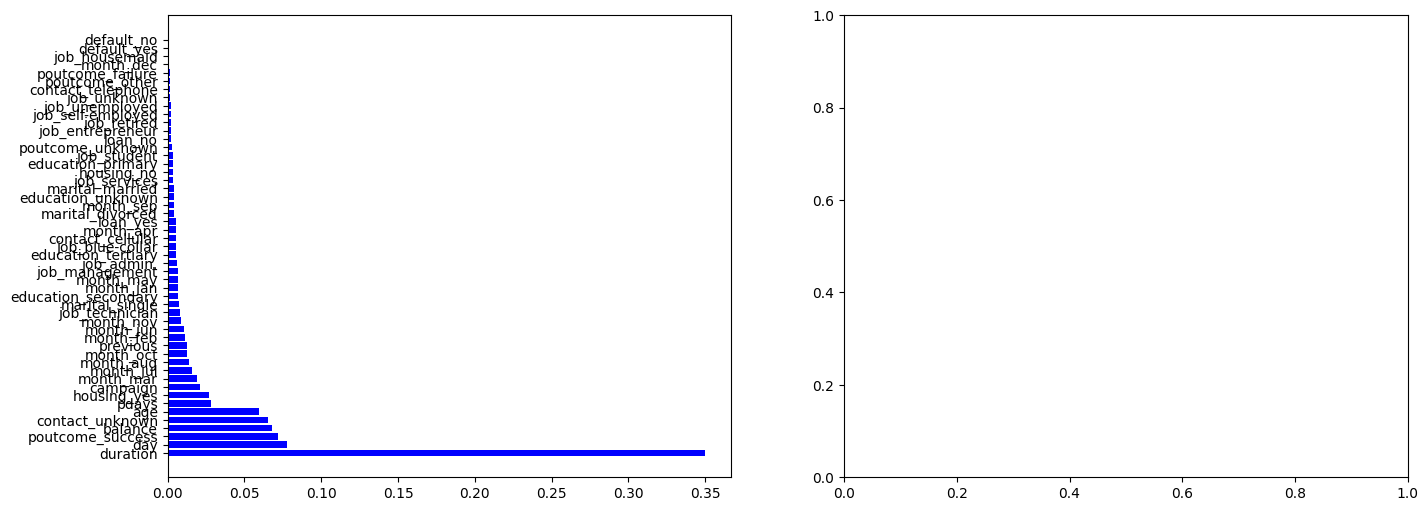

In [51]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Assuming you have already defined X_train, X_test, y_train, y_test, best_model

# --- 1. Accuracy vs. Number of Features ---

# Get feature importances and sort them
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order
features = X.columns

num_features_list = range(1, len(features) + 1, 5)  # Try different numbers of features
accuracy_list = []

for num_features in num_features_list:
    top_features = features[indices[:num_features]]
    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    clf = DecisionTreeClassifier(random_state=42)
    cv_scores = cross_val_score(clf, X_train_reduced, y_train, cv=5)
    accuracy_list.append(cv_scores.mean())

# Plot Accuracy vs. Number of Features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, accuracy_list, marker='o')
plt.title('Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-validated Accuracy')
plt.grid(True)
plt.show()


# --- 2. Model Complexity vs. Accuracy ---

max_depth_list = range(1, 21)  # Try different tree depths
accuracy_all_features = []
accuracy_top_10_features = []

top_10_features = features[indices[:10]]
X_train_reduced = X_train[top_10_features]
X_test_reduced = X_test[top_10_features]

for max_depth in max_depth_list:
    # All features
    clf_all = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    cv_scores_all = cross_val_score(clf_all, X_train, y_train, cv=5)
    accuracy_all_features.append(cv_scores_all.mean())

    # Top 10 features
    clf_top10 = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    cv_scores_top10 = cross_val_score(clf_top10, X_train_reduced, y_train, cv=5)
    accuracy_top_10_features.append(cv_scores_top10.mean())

# Plot Model Complexity vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depth_list, accuracy_all_features, marker='o', label='All Features')
plt.plot(max_depth_list, accuracy_top_10_features, marker='o', label='Top 10 Features')
plt.title('Model Complexity (Max Depth) vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validated Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Side-by-Side Feature Importance ---

# Calculate feature importances for both models
clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(X_train, y_train)
importances_all = clf_all.feature_importances_

clf_top10 = DecisionTreeClassifier(random_state=42)
clf_top10.fit(X_train_reduced, y_train)
importances_top10 = clf_top10.feature_importances_

# Plot Side-by-Side Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All features
indices_all = np.argsort(importances_all)[::-1]
axes[0].barh(range(len(indices_all)), importances_all[indices_all], color='b', align='center')
axes[0].set_yticks(range(len(indices_all)))
axes[0].set_yticklabels([features[i] for i in indices_all])